Training started
(3400, 40, 1) (1676, 40, 1)
<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C4C0E31C40>>
Saved trained model at C:\model\Emotion_Voice_Detection_Model.h5 
Epoch 1/100
54/54 [==============================] - 1s 10ms/step - loss: 4.9733 - accuracy: 0.3474 - val_loss: 2.1624 - val_accuracy: 0.5310
Epoch 2/100
54/54 [==============================] - 0s 7ms/step - loss: 2.7430 - accuracy: 0.5203 - val_loss: 2.6681 - val_accuracy: 0.5316
Epoch 3/100
54/54 [==============================] - 0s 7ms/step - loss: 1.8623 - accuracy: 0.5965 - val_loss: 2.6421 - val_accuracy: 0.5131
Epoch 4/100
54/54 [==============================] - 0s 7ms/step - loss: 1.4019 - accuracy: 0.6485 - val_loss: 1.4752 - val_accuracy: 0.6026
Epoch 5/100
54/54 [==============================] - 0s 7ms/step - loss: 1.1239 - accuracy: 0.6679 - val_loss: 1.6505 - val_accuracy: 0.5877
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - 

Epoch 57/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3413 - accuracy: 0.8815 - val_loss: 0.5392 - val_accuracy: 0.8180
Epoch 58/100
54/54 [==============================] - 0s 7ms/step - loss: 0.3388 - accuracy: 0.8829 - val_loss: 0.5394 - val_accuracy: 0.8174
Epoch 59/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3372 - accuracy: 0.8824 - val_loss: 0.5394 - val_accuracy: 0.8168
Epoch 60/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3453 - accuracy: 0.8762 - val_loss: 0.5395 - val_accuracy: 0.8162
Epoch 61/100
54/54 [==============================] - 0s 7ms/step - loss: 0.3414 - accuracy: 0.8809 - val_loss: 0.5395 - val_accuracy: 0.8156
Epoch 62/100
54/54 [==============================] - 0s 7ms/step - loss: 0.3379 - accuracy: 0.8800 - val_loss: 0.5395 - val_accuracy: 0.8162
Epoch 63/100
54/54 [==============================] - 0s 7ms/step - loss: 0.3419 - accuracy: 0.8782 - val_loss: 0.5395 - val_accuracy: 0.8162
Epoch 

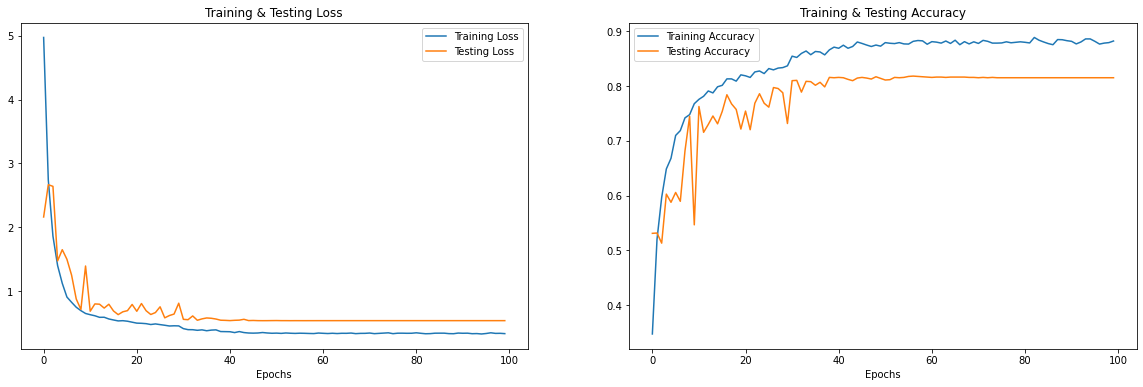

In [10]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
import pandas as pd
import numpy as np


class TrainModel:

    @staticmethod
    def train_neural_network(X, y) -> None:
        """
        This function trains the neural network.
        """

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        x_traincnn = np.expand_dims(X_train, axis=2)
        x_testcnn = np.expand_dims(X_test, axis=2)

        print(x_traincnn.shape, x_testcnn.shape)

        model = Sequential()
        model.add(Conv1D(64, 5, padding='same',
                         input_shape=(40, 1)))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(8))
        model.add(Activation('softmax'))

        print(model.summary)
        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])
        model_name = 'Emotion_Voice_Detection_Model.h5'

        # Save model and weights
        if not os.path.isdir("C:\\model"):
            os.makedirs("C:\\model")
        model_path = os.path.join("C:\\model", model_name)
        model.save(model_path)
        print('Saved trained model at %s ' % model_path)
        
        rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
        history=model.fit(x_traincnn, y_train, batch_size=64, epochs=100, validation_data=(x_testcnn, y_test), callbacks=[rlrp])
        print("Accuracy of our model on test data : " , model.evaluate(x_testcnn, y_test)[1]*100 , "%")
        
        predictions = model.predict_classes(x_testcnn)
        new_y_test = y_test.astype(int)
        matrix = confusion_matrix(new_y_test, predictions)

        print(classification_report(new_y_test, predictions))
        print(matrix)
        
        epochs = [i for i in range(100)]
        fig , ax = plt.subplots(1,2)
        trainAcc = history.history['accuracy']
        trainLoss = history.history['loss']
        testAcc = history.history['val_accuracy']
        testLoss = history.history['val_loss']

        fig.set_size_inches(20,6)
        ax[0].plot(epochs , trainLoss , label = 'Training Loss')
        ax[0].plot(epochs , testLoss , label = 'Testing Loss')
        ax[0].set_title('Training & Testing Loss')
        ax[0].legend()
        ax[0].set_xlabel("Epochs")
        ax[1].plot(epochs , trainAcc , label = 'Training Accuracy')
        ax[1].plot(epochs , testAcc , label = 'Testing Accuracy')
        ax[1].set_title('Training & Testing Accuracy')
        ax[1].legend()
        ax[1].set_xlabel("Epochs")
        plt.show()
        
        

if __name__ == '__main__':
    print('Training started')
    X = joblib.load("C:\\joblib_features\\X.joblib")
    y = joblib.load("C:\\joblib_features\\y.joblib")
    NEURAL_NET = TrainModel.train_neural_network(X=X, y=y)